#### **Welcome to Assignment 1 on Deep Learning for Computer Vision.**
In this assignment you will get a chance to implement basic Image processing tasks like Correlation, Convolution, Edge Detection etc.

#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the best!

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib inline uncomment this line if you're running this notebook on your local PC

In [2]:
# DO NOT CHANGE THIS CODE
np.random.seed(0)

In [3]:
def standardize(image):
    eps = 1e-5  # some fields have all 255 so variance will be 0, to avoid division by zero, introduced eps
    return (image - np.mean(image))/(np.std(image)+eps)

### Question 1

Where do you find the bright spot in the image displayed above? (*Hint:* Find the co-ordinates of the maximum value in the output array  )

1. $(143, 49)$
2. $(134, 47)$
3. $(130, 33)$
4. $(126, 50)$

In [4]:
# Implement Linear Filtering technique on an image using a linear filter
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]
    #print(image.shape)
    
    filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]
    #print(filter_.shape)

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    #print(result.shape)
    
    # YOUR CODE STARTS HERE
    for i in range(result_height):
        for j in range(result_width):
            temp = standardize(image[i:filter_height+i, j:filter_width+j]) * filter_
            try:
                result[i][j] = np.sum(temp)
            except ValueError as err:
                print("something went wrong", err)
                sys.exit()
    # YOUR CODE ENDS HERE
    return result
    

In [6]:
# To test your implementation, run the below code.
image_car = Image.open('./images/car_road.jpg')
filter_car = Image.open('./images/car.jpg')
result_car = linear_filter(image_car, filter_car)


(143, 49)


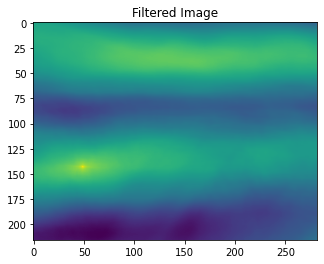

In [7]:
plt.imshow(result_car)
plt.title('Filtered Image')
idx = np.unravel_index(np.argmax(result_car), result_car.shape)
print(idx)

### Question 2

Where do you find the bright spot in the image displayed above? (*Hint:* Find the co-ordinates of the maximum value in the output array  )

1. $(2, 130)$
2. $(25, 118)$
3. $(0, 137)$
4. $(42, 115)$

In [8]:
# To test your implementation, run the below code.
image = Image.open('./images/hills.jpeg')
filter_ = Image.open('./images/template.png')
result = linear_filter(image, filter_)

idx = np.unravel_index(np.argmax(result), result.shape)
print(idx)

(0, 137)


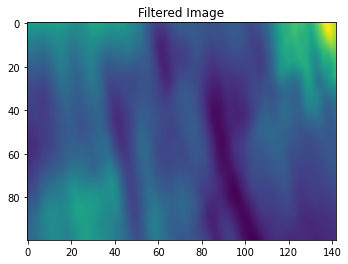

In [9]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

### Question 3

What are index of the min and max values in the above image?

1. $(43, 134), (200, 54)$
2. $(38, 142), (215, 61)$
3. $(30, 118), (198, 54)$
4. $(44, 142), (220, 43)$

In [10]:
# Implement Convolution on an image using a filter/kernel
def convolution2D(image, kernel):
    """
    Performs convolution on an image using a kernel.
    
    Arguments:
    image -- 2D matrix representing image.
    kernel -- kernel to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # YOUR CODE STARTS HERE
    kernel_new = filter_.transpose(Image.FLIP_TOP_BOTTOM).transpose(Image.FLIP_LEFT_RIGHT)
    result = linear_filter(image,kernel_new)
    
    # YOUR CODE ENDS HERE
    return result

In [15]:
# To test your implementation, run the below code.
image = Image.open('./images/car_road.jpg')
filter_ = Image.open('./images/car.jpg')
result = convolution2D(image, filter_)

idx = np.unravel_index(np.argmax(result), result.shape)
idy = np.unravel_index(np.argmin(result), result.shape)
print(idx)
print(idy)

(215, 61)
(38, 142)


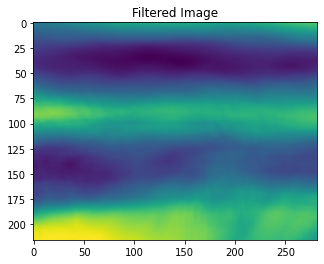

In [14]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

### Question 4

What are index of the min and max values in the above image?

1. $(15, 28), (18, 89)$
2. $(0, 27), (22, 98)$
3. $(4, 17), (14, 70)$
4. $(7, 42), (10, 89)$

In [23]:
# To test your implementation, run the below code.
image_hills = Image.open('./images/hills.jpeg')
filter_hills = Image.open('./images/template.png')
result_hills = convolution2D(image_hills, filter_hills)

idx = np.unravel_index(np.argmax(result_hills), result_hills.shape)
idy = np.unravel_index(np.argmin(result_hills), result_hills.shape)
print(idx)
print(idy)

(22, 98)
(0, 27)


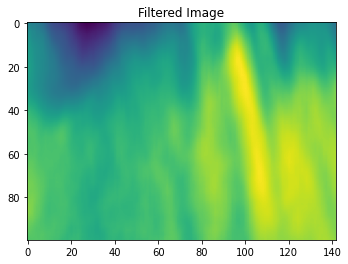

In [24]:
plt.imshow(result_hills)
plt.title('Filtered Image')
plt.show()

## Sobel and Laplace Filters

### Question 5: 
In this question you'll have to apply a Sobel Filter to the provided image and report the index of min and max value of the final output.

1. $(52, 147), (111, 26)$
2. $(50, 134), (100, 31)$
3. $(56, 152), (116, 18)$
4. $(51, 143), (114, 24)$


In [20]:

import numpy as np
from PIL import Image

image_clown = Image.open('./images/clown.png')

###YOUR CODE STARTS HERE

# Define 3*3 Vertical sobel filter (Hint: refer lecture slides)
sobel_v = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
sobel_v = Image.fromarray(sobel_v)

#Define 3*3 Horizontal sobel filter (Hint: refer lecture slides)
sobel_h = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
sobel_h = Image.fromarray(sobel_h)

#compute vertical response using convolution2D function
response_v = convolution2D(image_clown, sobel_v)
#plt.imshow(abs(response_v), cmap='gray')

#compute horizontal response using convolution2D function
response_h = convolution2D(image_clown, sobel_h)

#compute final response
# G = |G_x| + |G_y|
G = np.abs(response_h) + np.abs(response_v)
#plt.imshow(G, cmap='gray')

#compute index of min and max value of G
idx = np.unravel_index(np.argmax(G), G.shape)
idy = np.unravel_index(np.argmin(G), G.shape)
print(idx)
print(idy)

###YOUR CODE ENDS HERE

(111, 26)
(52, 147)


### Question 6

What are index of the min and max values of the Laplace Filter response to the provided image?

1. $(4, 117), (111, 26)$
2. $(13, 134), (100, 31)$
3. $(6, 108), (111, 26)$
4. $(10, 104), (106, 22)$

In [21]:

import numpy as np
from PIL import Image

image = Image.open('./images/clown.png')

###YOUR CODE STARTS HERE

# Define 3*3 Laplace filter (Hint: refer lecture slides)
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

#compute response using convolution2D function
response_L = convolution2D(image, laplacian_filter)

#compute index of min and max value of Laplace Filter response

###YOUR CODE ENDS HERE

In [22]:
print(np.unravel_index(np.argmax(response_L), np.shape(response_L)))
print(np.unravel_index(np.argmin(response_L), np.shape(response_L)))

(111, 26)
(6, 108)
